In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Aerofit

In [3]:
df_aerofit = pd.read_csv("aerofit.csv")

In [4]:
df_aerofit.head() 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df_aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<Axes: xlabel='Product', ylabel='Income'>

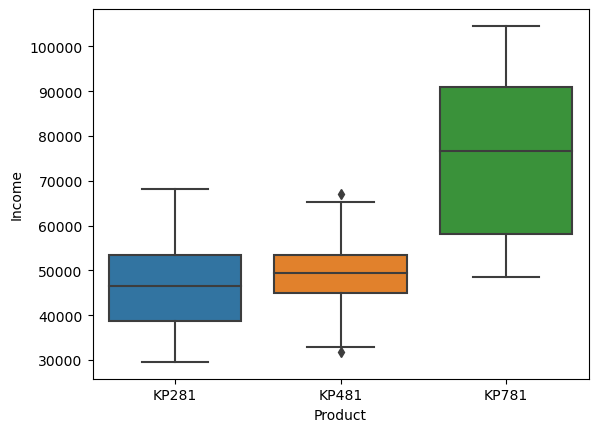

In [6]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [7]:
df_aerofit["random_group"] = np.random.choice(
    ["g1", "g2", "g3"],  
    size=len(df_aerofit)  
)

In [8]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g2
1,KP281,19,Male,15,Single,2,3,31836,75,g1
2,KP281,19,Female,14,Partnered,4,3,30699,66,g2
3,KP281,19,Male,12,Single,3,3,32973,85,g1
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1


<Axes: xlabel='random_group', ylabel='Income'>

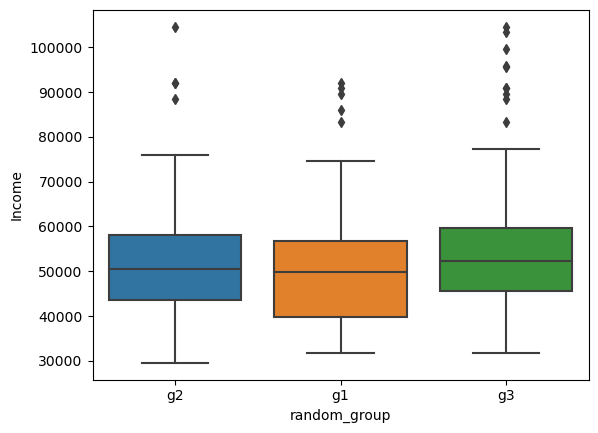

In [9]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

In [10]:
income_g1 = df_aerofit[df_aerofit["random_group"]=="g1"]["Income"]
income_g2 = df_aerofit[df_aerofit["random_group"]=="g2"]["Income"]
income_g3 = df_aerofit[df_aerofit["random_group"]=="g3"]["Income"]

In [11]:
income_g1.mean()

51905.527272727275

In [12]:
income_g2.mean()

52438.06896551724

In [13]:
income_g3.mean()

56318.08955223881

In [14]:
from scipy.stats import f_oneway

In [15]:
f_oneway(income_g1, income_g2, income_g3)

F_onewayResult(statistic=1.3422217522037931, pvalue=0.26391051103553204)

In [16]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


<Axes: xlabel='Product', ylabel='Income'>

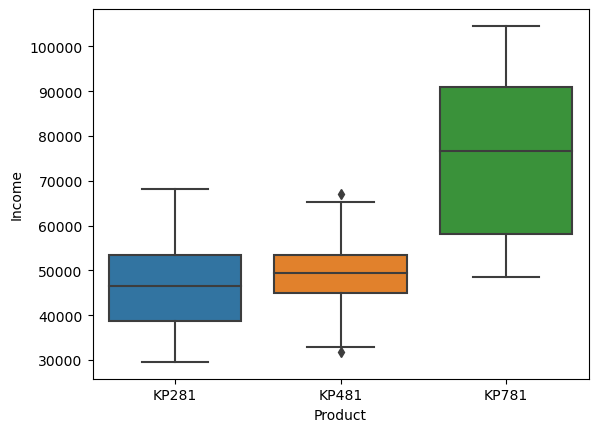

In [17]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [18]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [19]:
income_kp281.mean()

46418.025

In [20]:
income_kp481.mean()

48973.65

In [21]:
income_kp781.mean()

75441.575

In [22]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

f_oneway(income_kp281, income_kp481, income_kp781)

F_onewayResult(statistic=89.25903546601671, pvalue=1.5644991316342494e-27)

In [23]:
from scipy.stats import ttest_ind

#Pair-wise T test

#H0 : Two means are same


In [26]:
t_stat, p_value = ttest_ind(income_kp281, income_kp481)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.09487529747264932
Fail to reject H0


In [25]:
t_stat, p_value = ttest_ind(income_kp481, income_kp781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

7.770191623361236e-16
Reject H0


In [27]:
t_stat, p_value = ttest_ind(income_kp281, income_kp781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

4.116508528877672e-21
Reject H0


In [28]:
#Kruskal Wallis

from scipy.stats import kruskal

In [29]:
kruskal(income_kp281, income_kp481, income_kp781)

KruskalResult(statistic=61.43670384567185, pvalue=4.562357014275808e-14)

In [30]:
kruskal(income_g1, income_g2, income_g3)

KruskalResult(statistic=1.9346990844378458, pvalue=0.3800891143837996)

In [31]:
#Gaussian Test
df_hw = pd.read_csv("weight-height.csv")

In [32]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [33]:
height = df_hw["Height"]

<Axes: xlabel='Height', ylabel='Count'>

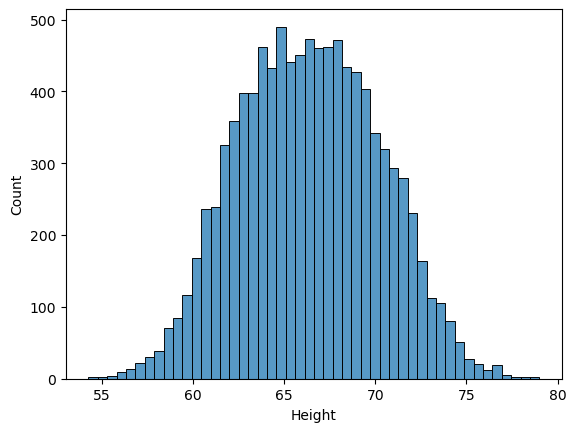

In [34]:
sns.histplot(height)

In [35]:
from statsmodels.graphics.gofplots import qqplot

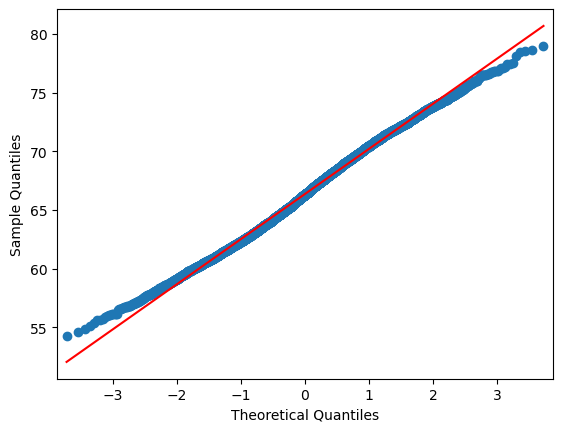

In [36]:
qqplot(height, line="s")
plt.show()

In [37]:
#Counter example
df_wt = pd.read_csv("waiting_time.csv")

In [38]:
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<Axes: xlabel='time', ylabel='Count'>

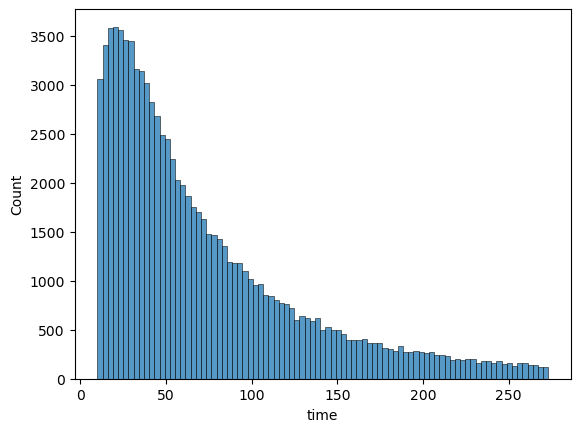

In [39]:
sns.histplot(df_wt["time"]) 

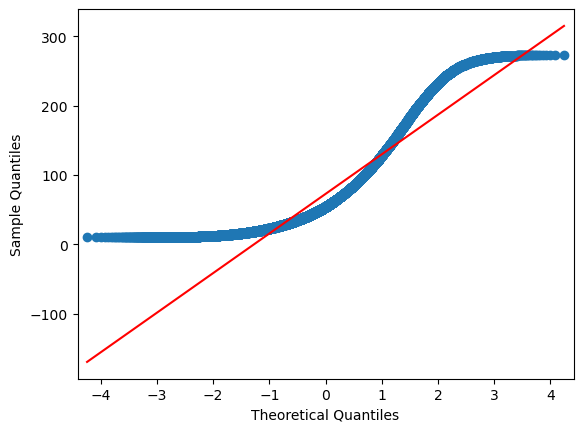

In [40]:
qqplot(df_wt["time"], line="s")
plt.show()

In [41]:
#Shapiro
from scipy.stats import shapiro 

In [50]:
height_subset = height.sample(100) 

In [51]:
#H0 : Data is Gaussian
#Ha : Data is not Gaussian

test_stat, p_value = shapiro(height_subset)
print(p_value)

0.9410324692726135


In [52]:
df_wt_subset = df_wt.sample(50)["time"]

In [53]:
test_stat, p_value = shapiro(df_wt_subset)
print(p_value)

1.4716324585606344e-06


In [54]:
# 3rd assumption verfication : levene test

In [55]:
from scipy.stats import levene

<Axes: xlabel='Height', ylabel='Count'>

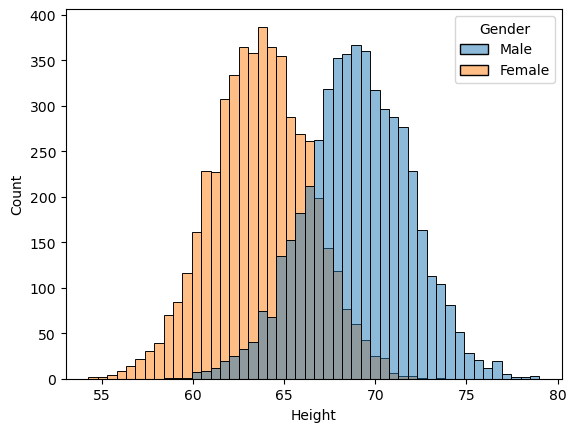

In [56]:
sns.histplot(data=df_hw, x="Height", hue="Gender")

In [57]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [58]:
height_men.mean()

69.02634590621741

In [59]:
height_women.mean()

63.70877360342507

In [60]:
from scipy.stats import ttest_ind

In [61]:
ttest_ind(height_men, height_women)

Ttest_indResult(statistic=95.60271449148823, pvalue=0.0)

In [62]:
height_men.var()

8.19884325252049

In [63]:
height_women.var()

7.269947493670132

In [64]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(height_men, height_women)
if p_value < 0.05:
    print("Variances are not equal")

Variances are not equal
